In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn

In [2]:
data = pd.read_csv('data/2025-02-11 1_57pm.csv')
data.head(2)

,CLIENT_ID,KYB_DATE,KYB_REF,BUSINESS_NAME_DURATION,PROVIDED_SERVICES_DURATION,BUSINESS_INCOME_LAST_WEEK_DURATION,BUSINESS_INCOME_LAST_MONTH_DURATION,PURPOSE_OF_FUNDS_DURATION,DEPOSIT_FREQUENCY_DURATION,PURCHASE_METHOD_DURATION
0,150675287.0,2025-01-18,2.335038e+11,29.0,10.0,7.0,2.0,30.0,6.0,5.0
1,29048438.0,2024-12-12,2.335454e+11,50.0,39.0,10.0,2.0,9.0,8.0,5.0


In [3]:
import matplotlib.pyplot as plt

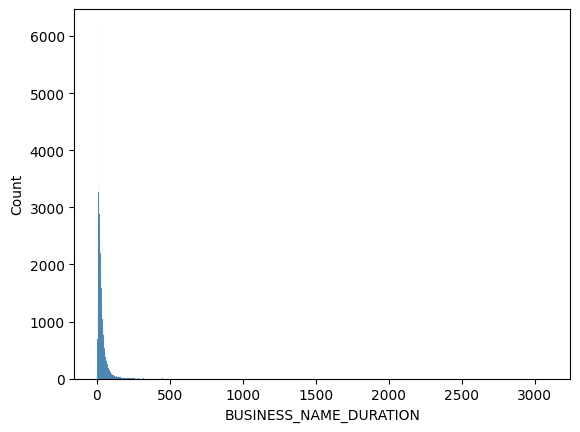

In [4]:
sns.histplot(x='BUSINESS_NAME_DURATION', data= data)
plt.show()

In [5]:
data.columns.to_list()

['CLIENT_ID',
 'KYB_DATE',
 'KYB_REF',
 'BUSINESS_NAME_DURATION',
 'PROVIDED_SERVICES_DURATION',
 'BUSINESS_INCOME_LAST_WEEK_DURATION',
 'BUSINESS_INCOME_LAST_MONTH_DURATION',
 'PURPOSE_OF_FUNDS_DURATION',
 'DEPOSIT_FREQUENCY_DURATION',
 'PURCHASE_METHOD_DURATION']

In [6]:
for col in data.columns.to_list(): 
    duration_bins = list(range(0, 1050, 50))  # [0, 50, 100, ..., 1000]
    dur_labels = [f'{i}-{i+50} sec' for i in range(0, 1000, 50)]
    df = data.copy()
    # Apply pd.cut()
    df['BUSINESS_NAME_DURATION'] = pd.cut(df['BUSINESS_NAME_DURATION'], bins=duration_bins, labels=dur_labels, right=False)

    # Group and aggregate
    dur_dr = df.groupby('BUSINESS_NAME_DURATION').agg(total_count=('CLIENT_ID', 'count')).reset_index()
    dur_dr.head(3)

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3740519439.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_dr = df.groupby('BUSINESS_NAME_DURATION').agg(total_count=('CLIENT_ID', 'count')).reset_index()
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3740519439.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_dr = df.groupby('BUSINESS_NAME_DURATION').agg(total_count=('CLIENT_ID', 'count')).reset_index()
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3740519439.py:9: FutureWarning: The default of observed=False is deprecated and will be changed

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.cut(df[col], bins=duration_bins, labels=dur_labels, right=False)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:10: FutureWarning: The default of observed=False is deprecated and 

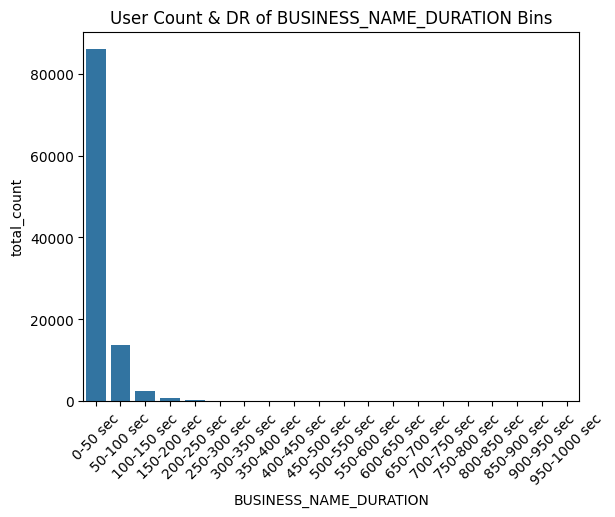

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.cut(df[col], bins=duration_bins, labels=dur_labels, right=False)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:10: FutureWarning: The default of observed=False is deprecated and 

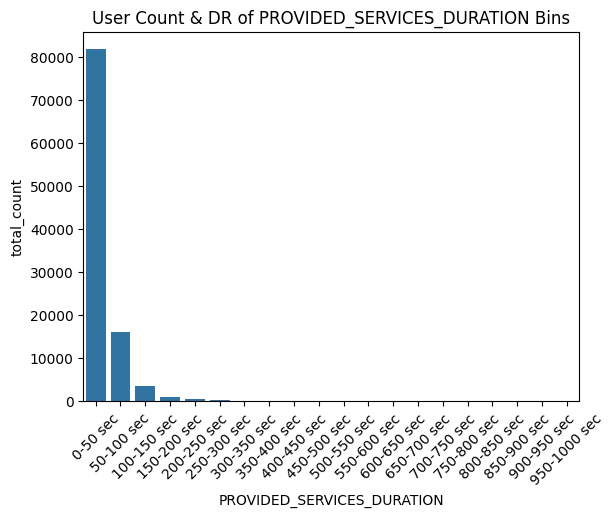

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.cut(df[col], bins=duration_bins, labels=dur_labels, right=False)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:10: FutureWarning: The default of observed=False is deprecated and 

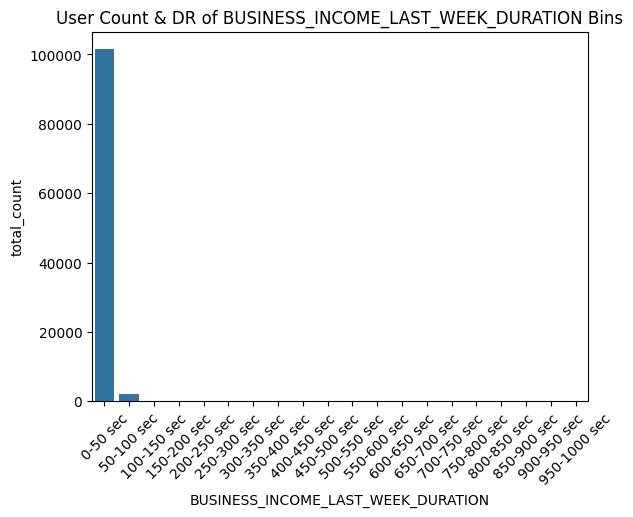

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.cut(df[col], bins=duration_bins, labels=dur_labels, right=False)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:10: FutureWarning: The default of observed=False is deprecated and 

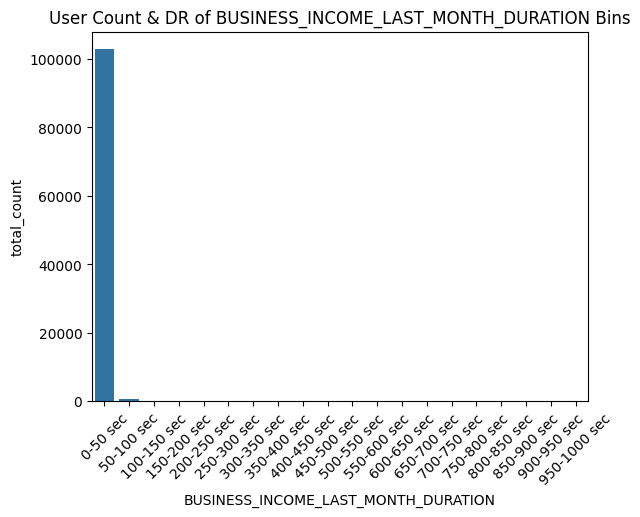

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.cut(df[col], bins=duration_bins, labels=dur_labels, right=False)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:10: FutureWarning: The default of observed=False is deprecated and 

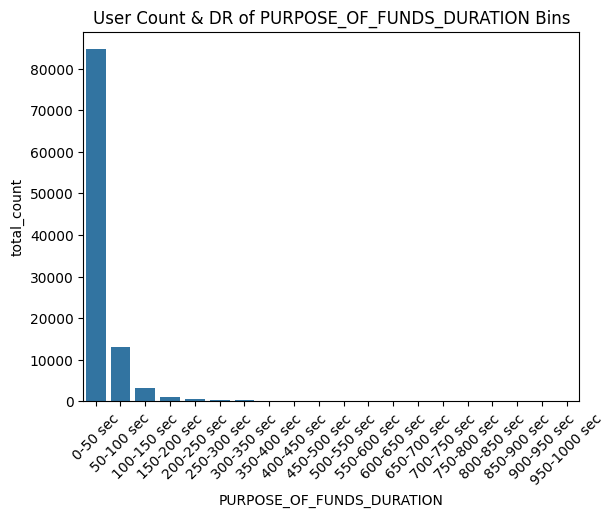

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.cut(df[col], bins=duration_bins, labels=dur_labels, right=False)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:10: FutureWarning: The default of observed=False is deprecated and 

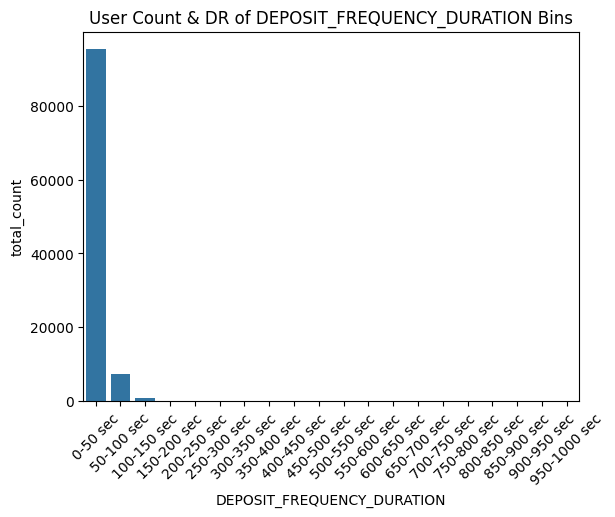

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.cut(df[col], bins=duration_bins, labels=dur_labels, right=False)
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_89711/3627969301.py:10: FutureWarning: The default of observed=False is deprecated and 

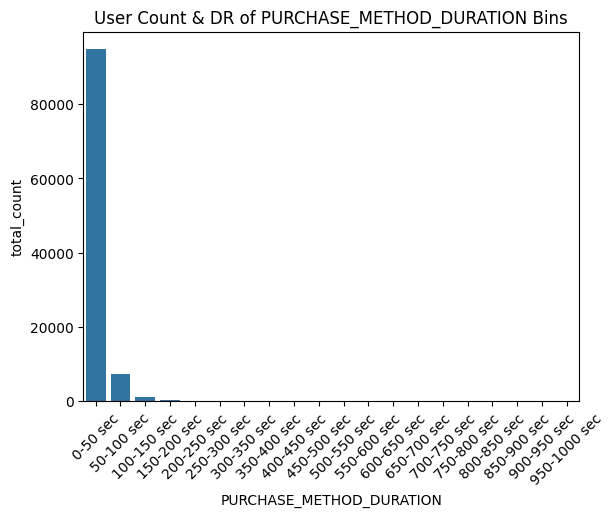

In [7]:
cols= data.drop(['CLIENT_ID', 'KYB_DATE', 'KYB_REF'], axis=1)
for col in cols.columns:
    # Check if column is numeric
    df = data[data[col] <= 500]
    df[col] = df[col].astype(float)
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = pd.cut(df[col], bins=duration_bins, labels=dur_labels, right=False)
        
        # Group and aggregate
        dur_dr = df.groupby(col).agg(total_count=('CLIENT_ID', 'count')).reset_index()

        # Plot histogram
        sns.barplot(x=col, y='total_count', data=dur_dr)
        plt.title(f'User Count & DR of {col} Bins')
        plt.xticks(rotation=45)  # Rotate labels for readability
        plt.show()
    else:
        print(f"Skipping non-numeric column: {col}")
